<a href="https://colab.research.google.com/github/AdamDock/SensorsCollab/blob/main/HWBuckets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

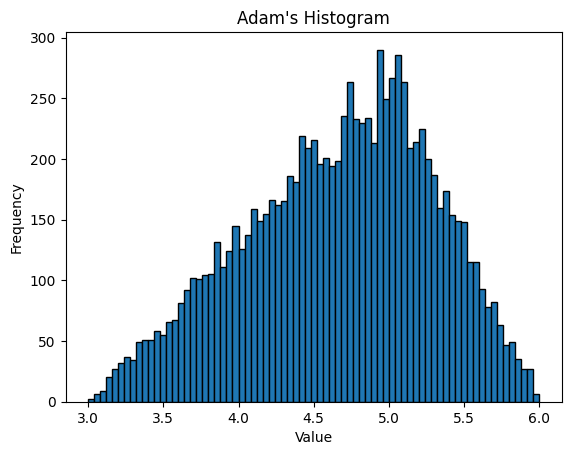

Bucket count: 75
Bucket width: 0.04
Bucket start: 3.0
Bucket end: 6.0


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
import math

# Load text into np array
data = np.loadtxt('HW_Ch4_Hist_Data.txt')

"""
Bucket count function takes number of samples
and outputs appropriate number of buckets based
on correlation from Bendat and Piersol
"""
def get_bucket_count(n):
    # K = 1.87 * (N - 1)^0.40 + 1
    k = 1.87 * (n - 1)**0.40 + 1
    return round(k)

bucket_amount = get_bucket_count(len(data))

# Get data_min and max
actual_min = np.min(data)
actual_max = np.max(data)

#calculate bucket width for range of values based on bucket approx and actual range
initial_bucket_width = (actual_max - actual_min) / bucket_amount

#round bucket width to an appropriate number for viewing.
def get_round_bucket_width(value):
    exp = math.floor(math.log10(value))
    frac = value / 10**exp
    nice = round(frac)
    return nice * 10**exp
bucket_width = get_round_bucket_width(initial_bucket_width)

# Round range ends to floor and ceiling in multiples of rounded bucket width
bucket_start = (actual_min // bucket_width) * bucket_width
bucket_end = (math.ceil(actual_max / bucket_width)) * bucket_width
# create bucket x values for chart
buckets = arange(bucket_start,bucket_end, bucket_width)
#recalculate bucket count based on new round width/end/start
final_bucket_count = (bucket_end - bucket_start) / bucket_width
#create bucket array to house occurences
bucketCounts = np.zeros(int(final_bucket_count))

#loop through data values, and deposit in buckets based on index.
for value in data:
    index = int((value - bucket_start) / bucket_width)
    if index >= len(bucketCounts):
        index = len(bucketCounts) - 1 #protects against case where bucket start/ends and data min/max are the same
    bucketCounts[index] += 1
plt.bar(buckets, bucketCounts, width=bucket_width, align='edge', edgecolor='black')
plt.title("Adam's Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

print(f"Bucket count: {bucket_amount}")
print(f"Bucket width: {bucket_width}")
print(f"Bucket start: {bucket_start}")
print(f"Bucket end: {bucket_end}")


